# Import Libraries

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


### First thing we should do is to see our dataset and answer some questions 

In [4]:
insurance_train_filepath = "./kaggle/train/train.csv"

# Read the file into a variable insurance_data_train
insurance_data_train = pd.read_csv(insurance_train_filepath, index_col="id")

In [5]:
insurance_test_filepath = "./kaggle/test/test.csv"

# Read the file into a variable insurance_data_train
insurance_data_test = pd.read_csv(insurance_test_filepath)

### The best start you need to do on your project is to see you dataset and the shape of it 

In [6]:
insurance_data_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [7]:
insurance_data_train.shape

(11504798, 11)

In [8]:
insurance_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ GB


### It seems that there are some features which are categorical

### Checking the missing values in this dataset 

In [9]:
missing_values = insurance_data_train.isnull().sum()
missing_values

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### Good! There are no missing values

# Exploratory Data Analysis(EDA)

In [10]:
insurance_data_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

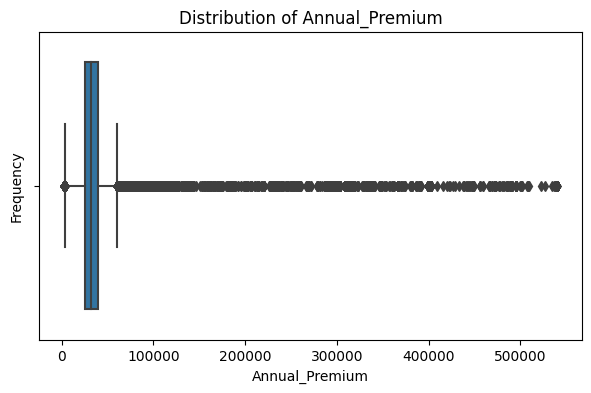

In [10]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=insurance_data_train['Annual_Premium'])
plt.title('Distribution of Annual_Premium')
plt.xlabel('Annual_Premium')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


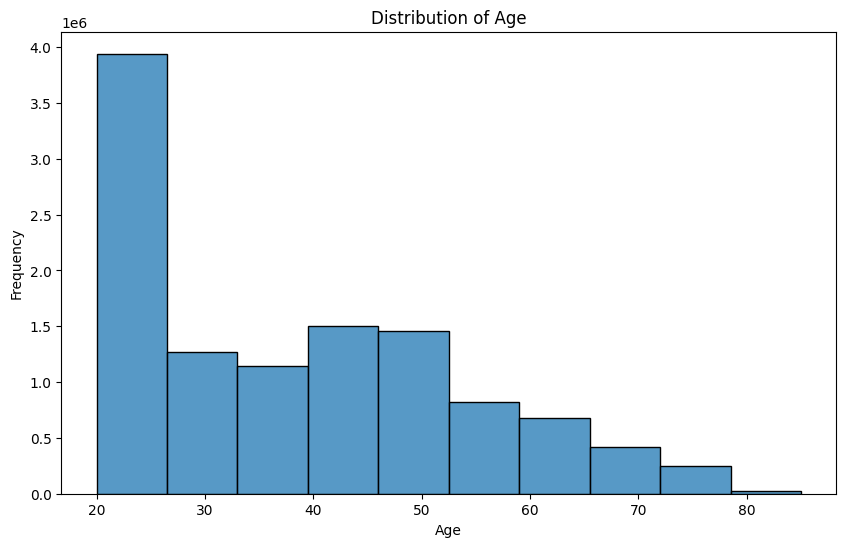

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data_train['Age'], kde=False, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


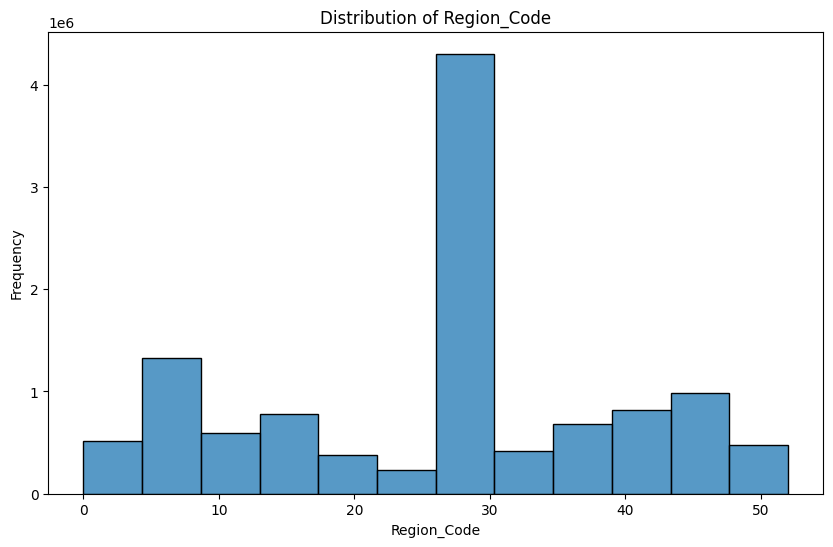

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data_train['Region_Code'], kde=False, bins=12)
plt.title('Distribution of Region_Code')
plt.xlabel('Region_Code')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


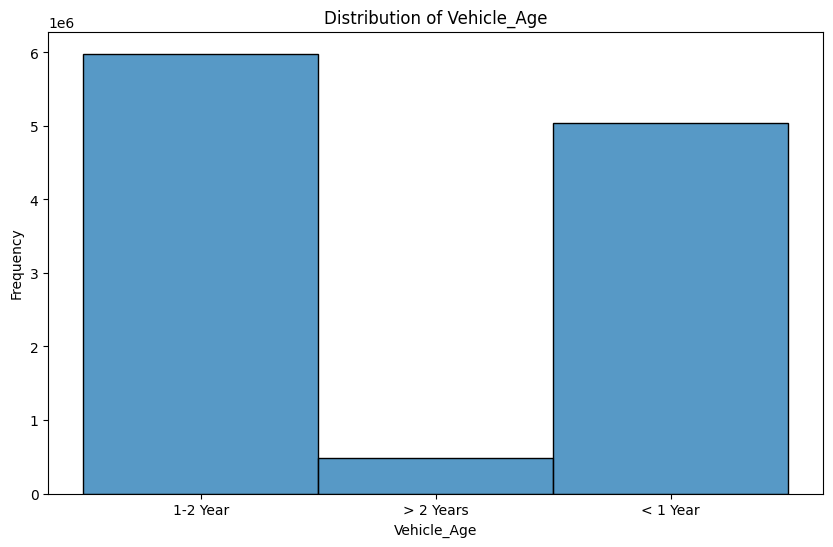

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data_train['Vehicle_Age'], kde=False, bins=10)
plt.title('Distribution of Vehicle_Age')
plt.xlabel('Vehicle_Age')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Checking Imbalance in Training Data Or Response')

<Figure size 600x600 with 0 Axes>

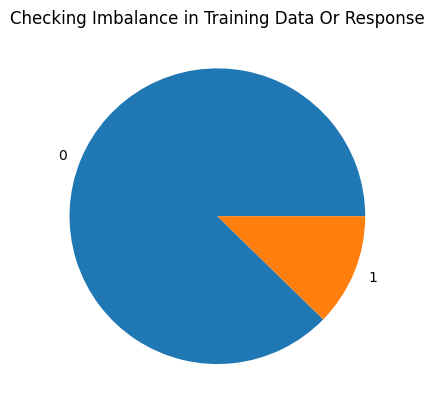

In [13]:
response_data = insurance_data_train['Response'].value_counts()
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
ax.pie(response_data, labels = [0,1])
ax.set_title('Checking Imbalance in Training Data Or Response')

### It seems that the data is imbalanced 

# Feature Engineering

In [11]:
insurance_data_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


### Handle Categorical Data

### For Training

In [12]:
insurance_data_train['Vehicle_Age'] = insurance_data_train['Vehicle_Age'].astype('category')
insurance_data_train = pd.get_dummies(insurance_data_train, columns=['Vehicle_Age'])
insurance_data_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
id,,,,,,,,,,,,,
0,Male,21,1,35.0,0,Yes,65101.0,124.0,187,0,1,0,0
1,Male,43,1,28.0,0,Yes,58911.0,26.0,288,1,0,0,1
2,Female,25,1,14.0,1,No,38043.0,152.0,254,0,0,1,0
3,Female,35,1,1.0,0,Yes,2630.0,156.0,76,0,1,0,0
4,Female,36,1,15.0,1,No,31951.0,152.0,294,0,1,0,0


### For Testing 

In [13]:
insurance_data_test['Vehicle_Age'] = insurance_data_test['Vehicle_Age'].astype('category')
insurance_data_test = pd.get_dummies(insurance_data_test, columns=['Vehicle_Age'])
insurance_data_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,11504798,Female,20,1,47.0,0,No,2630.0,160.0,228,0,1,0
1,11504799,Male,47,1,28.0,0,Yes,37483.0,124.0,123,1,0,0
2,11504800,Male,47,1,43.0,0,Yes,2630.0,26.0,271,1,0,0
3,11504801,Female,22,1,47.0,1,No,24502.0,152.0,115,0,1,0
4,11504802,Male,51,1,19.0,0,No,34115.0,124.0,148,1,0,0


In [14]:
def vehicle_damage(Vehicle_Damage):
    if Vehicle_Damage == 'Yes':
        return 1
    return 0

In [15]:
insurance_data_train['Vehicle_Damages'] = insurance_data_train['Vehicle_Damage'].apply(vehicle_damage)
insurance_data_train.drop(['Vehicle_Damage'],axis=1, inplace=True)

In [16]:
insurance_data_test['Vehicle_Damages'] = insurance_data_test['Vehicle_Damage'].apply(vehicle_damage)
insurance_data_test.drop(['Vehicle_Damage'],axis=1, inplace=True)

In [17]:
insurance_data_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damages
id,,,,,,,,,,,,,
0,Male,21,1,35.0,0,65101.0,124.0,187,0,1,0,0,1
1,Male,43,1,28.0,0,58911.0,26.0,288,1,0,0,1,1
2,Female,25,1,14.0,1,38043.0,152.0,254,0,0,1,0,0
3,Female,35,1,1.0,0,2630.0,156.0,76,0,1,0,0,1
4,Female,36,1,15.0,1,31951.0,152.0,294,0,1,0,0,0


In [18]:
insurance_data_test['Gender'] = insurance_data_test['Gender'].astype('category')
insurance_data_test = pd.get_dummies(insurance_data_test, columns=['Gender'],drop_first=True)

insurance_data_train['Gender'] = insurance_data_train['Gender'].astype('category')
insurance_data_train = pd.get_dummies(insurance_data_train, columns=['Gender'],drop_first=True)

### Split the dataset

In [19]:
X_train = insurance_data_train[['Age', 'Driving_License', 
                                'Region_Code', 
              'Previously_Insured', 'Annual_Premium', 
              'Policy_Sales_Channel', 'Vintage', 
              'Vehicle_Damages', 'Vehicle_Age_1-2 Year',
              'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
              'Gender_Male']]
y_train = insurance_data_train['Response']

X_test = insurance_data_test[['Age', 'Driving_License', 
                              'Region_Code', 'Previously_Insured',
                              'Annual_Premium', 
                              'Policy_Sales_Channel', 'Vintage', 
                              'Vehicle_Damages',
                              'Vehicle_Age_1-2 Year',
                              'Vehicle_Age_< 1 Year',
                              'Vehicle_Age_> 2 Years', 
                              'Gender_Male']]

### Using Smote To Handle Imblanced Data

In [20]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())
print()
print(y_train_smote.value_counts())

0    10089739
1     1415059
Name: Response, dtype: int64

0    10089739
1    10089739
Name: Response, dtype: int64


### Scaling the dataset

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train_smote)
data_scaled = scaler.fit_transform(insurance_data_train)

In [23]:
test_dataset = scaler.fit_transform(insurance_data_test)

# Apply the neural network model

### Split the dataset

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_smote, 
                                                    test_size=0.3, random_state=42)

In [25]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(14125634, 12) (14125634,) (6053844, 12) (6053844,)


In [26]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
print("Setup Completed!")

Setup Completed!


In [27]:
model = Sequential(
    [               
        tf.keras.Input(shape=(12,)),    #specify input size
        ### START CODE HERE ### 
        Dense(units = 35, activation='sigmoid'),#layer-1
        Dense(units = 25, activation='sigmoid'),#layer-2
        Dense(units = 15, activation='sigmoid'), #layer-3
        Dense(units = 1, activation='sigmoid')#output layer
        
        ### END CODE HERE ### 
    ], name = "nn_model" 
)                            


In [28]:
model.summary()

Model: "nn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 35)                455       
                                                                 
 dense_1 (Dense)             (None, 25)                900       
                                                                 
 dense_2 (Dense)             (None, 15)                390       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1761 (6.88 KB)
Trainable params: 1761 (6.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
[layer1, layer2, layer3, layer4] = model.layers

In [30]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
W4,b4 = layer4.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")
print(f"W4 shape = {W4.shape}, b4 shape = {b4.shape}")

W1 shape = (12, 35), b1 shape = (35,)
W2 shape = (35, 25), b2 shape = (25,)
W3 shape = (25, 15), b3 shape = (15,)
W4 shape = (15, 1), b4 shape = (1,)


In [31]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['Accuracy'],
)

history = model.fit(
    X_train,
    y_train,
    batch_size=96,
    epochs=50,
    validation_data=(X_test, y_test),
    
)

Epoch 1/50
147143/147143 [==============================] - 352s 2ms/step - loss: 0.3697 - Accuracy: 0.8123 - val_loss: 0.3659 - val_Accuracy: 0.8146
Epoch 2/50
147143/147143 [==============================] - 338s 2ms/step - loss: 0.3655 - Accuracy: 0.8149 - val_loss: 0.3646 - val_Accuracy: 0.8153
Epoch 3/50
147143/147143 [==============================] - 325s 2ms/step - loss: 0.3644 - Accuracy: 0.8155 - val_loss: 0.3635 - val_Accuracy: 0.8159
Epoch 4/50
147143/147143 [==============================] - 323s 2ms/step - loss: 0.3632 - Accuracy: 0.8162 - val_loss: 0.3623 - val_Accuracy: 0.8165
Epoch 5/50
147143/147143 [==============================] - 418s 3ms/step - loss: 0.3620 - Accuracy: 0.8169 - val_loss: 0.3612 - val_Accuracy: 0.8174
Epoch 6/50
147143/147143 [==============================] - 375s 3ms/step - loss: 0.3611 - Accuracy: 0.8174 - val_loss: 0.3607 - val_Accuracy: 0.8177
Epoch 7/50
147143/147143 [==============================] - 383s 3ms/step - loss: 0.3603 - Accuracy:

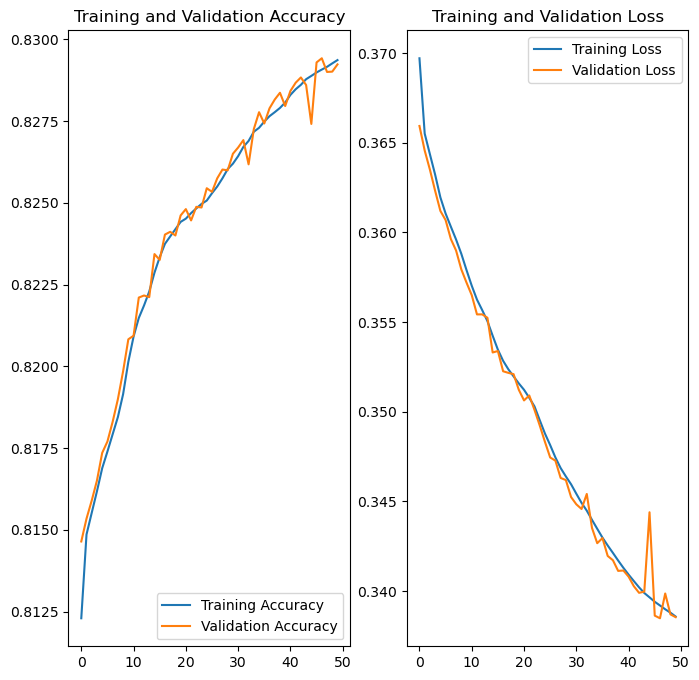

In [33]:
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
X_test = insurance_data_test[['Age', 'Driving_License', 
                              'Region_Code', 'Previously_Insured',
                              'Annual_Premium', 
                              'Policy_Sales_Channel', 'Vintage', 
                              'Vehicle_Damages',
                              'Vehicle_Age_1-2 Year',
                              'Vehicle_Age_< 1 Year',
                              'Vehicle_Age_> 2 Years', 
                              'Gender_Male']]

In [41]:
X_test_scaled = scaler.fit_transform(X_test)

In [43]:
X_test_scaled.shape

(7669866, 12)

In [44]:
prediction = model.predict(X_test_scaled)

239684/239684 [==============================] - 341s 1ms/step


In [45]:
prediction

array([[0.55979526],
       [0.9999997 ],
       [0.63005084],
       ...,
       [0.00383412],
       [0.4300397 ],
       [0.03629122]], dtype=float32)

In [53]:
submit = pd.read_csv('./kaggle/sample_submission/sample_submission.csv')
submit.Response = prediction
submit[['id', 'Response']].to_csv('./kaggle/working/neural_network.csv', index=False)

In [52]:
"""def my_tf_round(X, decimals = 3):
    multiplier = tf.constant(10**decimals, dtype=X.dtype)
    return tf.math.round(X * multiplier) / multiplier"""

'def my_tf_round(X, decimals = 3):\n    multiplier = tf.constant(10**decimals, dtype=X.dtype)\n    return tf.math.round(X * multiplier) / multiplier'